#PROJECT6_E-COMMERCE_CSVFILE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("/content/sample_data/ecommerce_customer_data_custom_ratios[1].csv")
data.head(1)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0


In [3]:
#data2 = pd.read_csv("/content/sample_data/ecommerce_customer_data_large[1].csv")
#data.head(1)

In [4]:
#finding null values

print(data.shape)
data.isnull().sum()

(250000, 13)


,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47596
Customer Name,0


In [5]:
#drop null values

data2 = data.dropna()
data2.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,0
Customer Name,0


In [6]:
#shape of file after dropping null values
data2.shape

(202404, 13)

#1) What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?

In [56]:
#1) What are the trends in total purchase amount over time (based on Purchase Date)? Are there any seasonal patterns?
#"Total Purchase Amount","	Purchase Date"
data.head(1)
df = data2.groupby("Purchase Date")["Total Purchase Amount"].sum().reset_index()
sorted = df.sort_values("Total Purchase Amount",ascending = False)
sorted1 = sorted.head(15)
sorted


,Purchase Date,Total Purchase Amount
114845,2022-02-06 17:18:39,9823
8289,2020-02-26 00:41:53,9817
118854,2022-03-05 01:02:19,9621
109872,2022-01-04 06:50:07,9527
160697,2022-12-11 21:28:58,9495
...,...,...
123491,2022-04-04 22:29:15,107
120006,2022-03-12 13:51:17,106
14570,2020-04-08 07:29:51,105
174292,2023-03-13 18:48:00,103


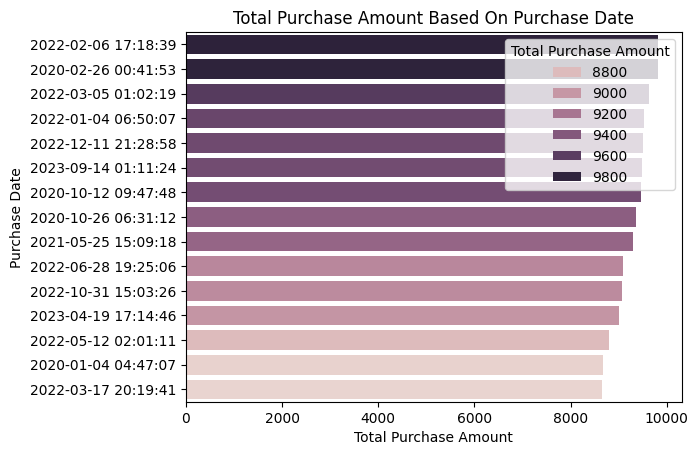

In [57]:
sn.barplot(sorted1,y = "Purchase Date",x = "Total Purchase Amount",hue = "Total Purchase Amount")
plt.title("Total Purchase Amount Based On Purchase Date")
plt.show()

#2) Which product categories generate the highest revenue and which are the most popular based on quantity purchased?

In [66]:
#2) Which product categories generate the highest revenue and which are the most popular based on quantity purchased?

#"Product Category","Product Price","Quantity"
#--a)"Product Category","Product Price"
df = data2.groupby("Product Category")["Product Price"].sum().reset_index()
sorted = df.sort_values("Product Price", ascending=False)
sorted

,Product Category,Product Price
0,Books,15432741
1,Clothing,15415042
2,Electronics,10349310
3,Home,10289915


In [69]:
highest = sorted.iloc[0]
print(f"{highest['Product Category']} product got highest revenue {highest['Product Price']} rupees")

Books product got highest revenue 15432741 rupees


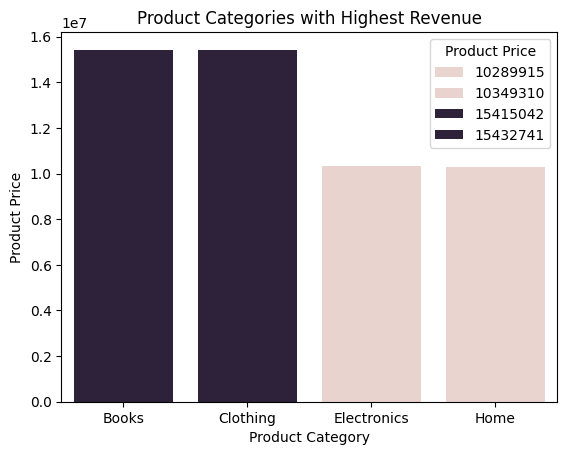

In [19]:
sn.barplot(data = sorted,x = "Product Category",y = "Product Price",hue = "Product Price")
plt.title("Product Categories with Highest Revenue")
plt.show()

In [21]:
#-->b)"Product Category","Quantity"
df = data.groupby("Product Category")["Quantity"].sum().reset_index()
sorted = df.sort_values("Quantity",ascending = False)
sorted

,Product Category,Quantity
1,Clothing,225322
0,Books,223876
2,Electronics,150828
3,Home,149698


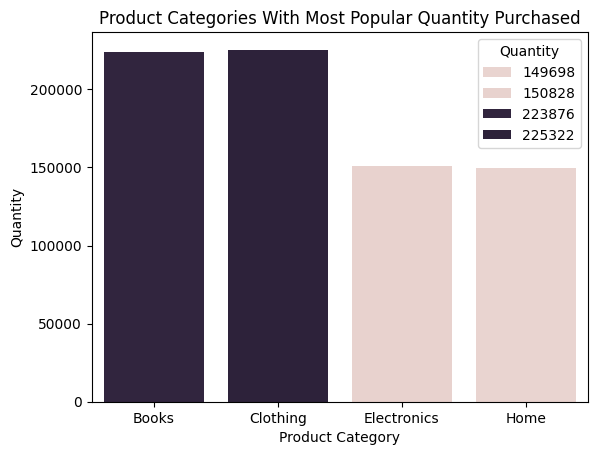

In [26]:
sn.barplot(data = df,x = "Product Category",y = "Quantity",hue = "Quantity")
plt.title("Product Categories With Most Popular Quantity Purchased")
plt.show()

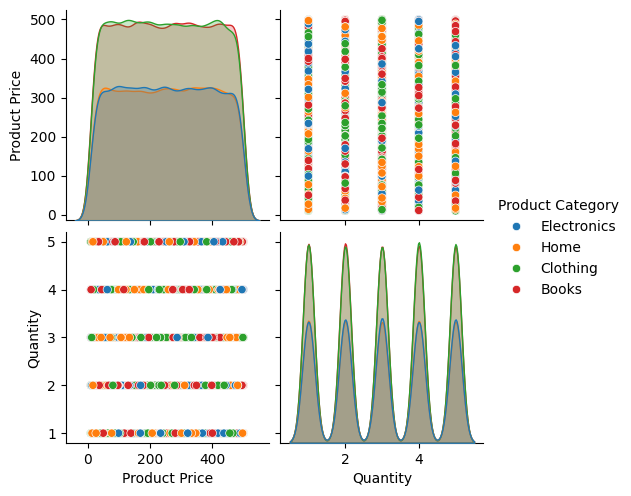

In [24]:
sn.pairplot(data2[["Product Category","Product Price","Quantity"]],hue = "Product Category")
plt.show()

#3) What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?

In [29]:
#3) What are the most popular payment methods, and how do they relate to the total purchase amount or frequency of purchases?
#"Payment Method","Total Purchase Amount"
df = data2.groupby("Payment Method")["Total Purchase Amount"].sum().reset_index()
sorted = df.sort_values("Total Purchase Amount",ascending = False)
sorted

,Payment Method,Total Purchase Amount
1,Credit Card,222023413
3,PayPal,165083967
0,Cash,109971818
2,Crypto,54498179


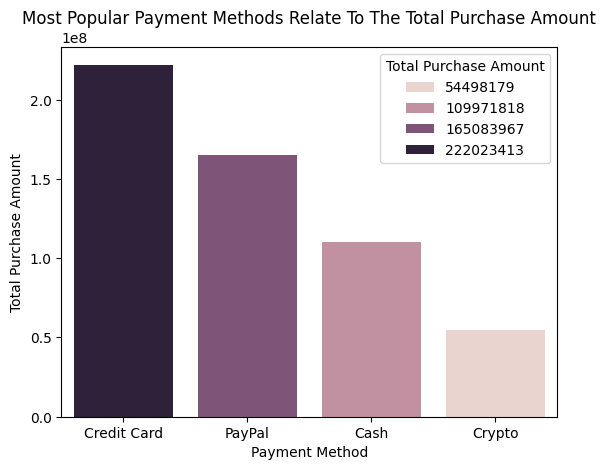

In [39]:
sn.barplot(data = sorted,x = "Payment Method",y = "Total Purchase Amount",hue = "Total Purchase Amount")
plt.title("Most Popular Payment Methods Relate To The Total Purchase Amount")
plt.show()

#4) Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?

In [48]:
#4) Who are the top customers by total purchase amount or frequency, based on Customer ID and Customer Name?
data.head(1)
#"Customer Name","Total Purchase Amount"
df = data2.groupby("Customer ID")["Total Purchase Amount"].sum().reset_index()
sorted = df.sort_values("Total Purchase Amount",ascending = False)
sorted1 = sorted.head(15)
sorted

,Customer ID,Total Purchase Amount
26537,26977,48497
6667,6786,42385
1175,1195,41980
36086,36706,41976
43584,44337,41562
...,...,...
32690,33238,162
34436,35013,162
13073,13297,157
1358,1382,153


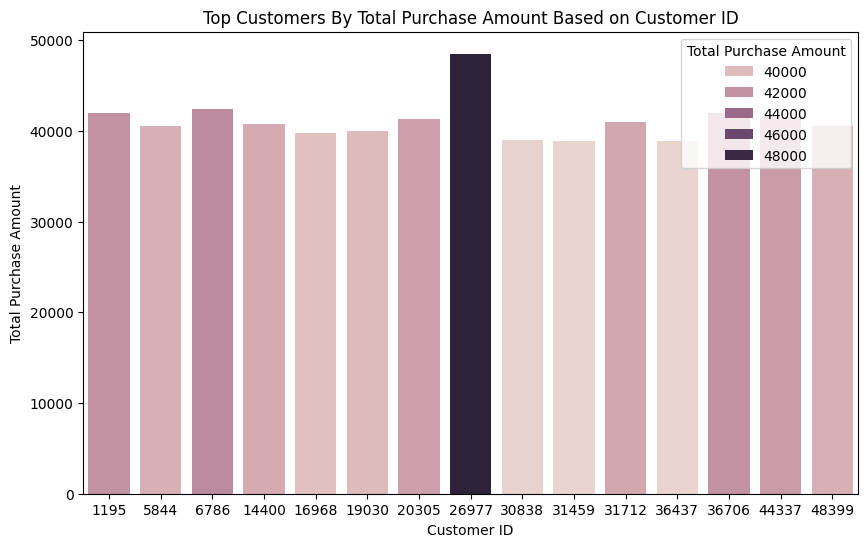

In [54]:
plt.figure(figsize = (10,6))
sn.barplot(data = sorted1,x = "Customer ID",y = "Total Purchase Amount",hue = "Total Purchase Amount")
plt.title("Top Customers By Total Purchase Amount Based on Customer ID")
plt.show()